# Connecting to Mongo on EC2

In [1]:
import komod
from pymongo import MongoClient
from bson.objectid import ObjectId
import numpy as np
import os
from datetime import datetime, timedelta
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
client = MongoClient(
    "mongodb://{}:{}@18.216.205.251/kojak".format(
        str(os.environ['mdbUN']),
        str(os.environ['mdbPW'])
    )
)

kdb = client.kojak
test = client.kojak.testData
songs = client.kojak.test_songs

## Mongo Review

In [ ]:
result = test.insert_one({"name": "Laurel", "age": 34, "coffee": False})

In [16]:
result.inserted_id

ObjectId('5a13475d8d3ce003b0ef7c9d')

In [36]:
for doc in test.find():
    print(doc)

{'_id': ObjectId('5a1336ed3274e85302353021'), 'name': 'David', 'coffee': True, 'age': 38.0}
{'_id': ObjectId('5a13472b8d3ce003b0ef7c9b'), 'name': 'Jim', 'age': 34}
{'_id': ObjectId('5a1347418d3ce003b0ef7c9c'), 'name': 'Joe', 'coffee': True, 'age': 29}
{'_id': ObjectId('5a13475d8d3ce003b0ef7c9d'), 'name': 'Laurel', 'coffee': False, 'age': 34}


In [33]:
result = test.update_many({'male': True},
                     {"$unset": {"male": ""}}
                    )

In [34]:
result.modified_count

0

In [37]:
result = kdb.test2.insert_one({'chunk_id': '000001', 'title': '12 Comatose Joe'})

In [45]:
for item in os.listdir('../audio/dump'):
    print(item)

.DS_Store


In [52]:
kdb.test_songs.find_one({"chunk_id": '009900'})

{'_id': ObjectId('5a1489ae8d3ce00a04e3ab0e'),
 'chunk_id': '009900',
 'song_name': 'Maundering'}

## DB Check-In

Development of a short script that I can execute from the command line to check in on how many samples have been labeled and with which elements.

In [6]:
songs.find_one({"labeled": True})

{'_id': ObjectId('5a1476ff8d3ce0099ff2f34f'),
 'chunk_id': '000005',
 'labeled': True,
 'piano': 0,
 'sax': 0,
 'skipped': False,
 'song_name': 'a Lickin',
 'vocals': 0}

In [14]:
songs.count()

21487

In [15]:
songs.find({"labeled": True}).count()

467

In [7]:
songs.find({"skipped": True}).count()

17

In [9]:
songs.find({"sax": 2}).count()

129

In [11]:
songs.find({"piano": 2}).count()

40

In [12]:
songs.find({"vocals": 2}).count()

177

In [65]:
## working copy, since modularized
# def db_status():
#     """
#     Prints labeling status of samples in DB.
#     """
    
#     db = kdb.test_songs
    
#     # creating dict of db figures
#     figs = {}
    
#     figs['total'] = [db.count()]
#     figs['labeled'] = [db.find({"labeled": True}).count()]
#     figs['vox_fg'] = [db.find({"vocals": 2}).count()]
#     figs['vox_bg'] = [db.find({"vocals": 1}).count()]
#     figs['sax_fg'] = [db.find({"sax": 2}).count()]
#     figs['sax_bg'] = [db.find({"sax": 1}).count()]
#     figs['piano_fg'] = [db.find({"piano": 2}).count()]
#     figs['piano_bg'] = [db.find({"piano": 1}).count()]

    
#     for k, v in figs.items():
#         figs[k].append(round(100 * v[0]/figs['labeled'][0], 2))

#     print("\nSAMPLE DATABASE STATUS")
#     print("{} samples total".format(figs['total'][0]))
#     print("-" * 40)
#     print("Labeled samples:\t{}\t{}%"
#           .format(figs['labeled'][0], figs['labeled'][1]))
#     print("Vocals, foreground:\t{}\t{}%".format(figs['vox_fg'][0], figs['vox_fg'][1]))
#     print("Vocals, background:\t{}\t{}%".format(figs['vox_bg'][0], figs['vox_bg'][1]))
#     print("Saxophone, foreground:\t{}\t{}%".format(figs['sax_fg'][0], figs['sax_fg'][1]))
#     print("Saxophone, background:\t{}\t{}%".format(figs['sax_bg'][0], figs['sax_bg'][1]))
#     print("Piano, foreground:\t{}\t{}%".format(figs['piano_fg'][0], figs['piano_fg'][1]))
#     print("Piano, background:\t{}\t{}%".format(figs['piano_bg'][0], figs['piano_bg'][1]))
    

In [66]:
db_status()


SAMPLE DATABASE STATUS
21487 samples total
----------------------------------------
Labeled samples:	571	100.0%
Vocals, foreground:	222	38.88%
Vocals, background:	17	2.98%
Saxophone, foreground:	157	27.5%
Saxophone, background:	54	9.46%
Piano, foreground:	56	9.81%
Piano, background:	157	27.5%


In [3]:
current_status = komod.db_status()


SAMPLE DATABASE STATUS
21487 samples total
----------------------------------------
Labeled samples		1054	100.0%
Skipped samples		50	  4.7%
Vocals, foreground	406	 38.5%
Vocals, background	25	  2.4%
Saxophone, foreground	288	 27.3%
Saxophone, background	91	  8.6%
Piano, foreground	98	  9.3%
Piano, background	289	 27.4%
---------------------------------------- 



In [4]:
current_status

{'labeled': [1054, 100.0],
 'piano_bg': [289, 27.4],
 'piano_fg': [98, 9.3],
 'sax_bg': [91, 8.6],
 'sax_fg': [288, 27.3],
 'skipped': [50, 4.7],
 'timestamp': datetime.datetime(2017, 11, 28, 16, 24, 2, 653522),
 'total': [21487, 2038.6],
 'vox_bg': [25, 2.4],
 'vox_fg': [406, 38.5]}

In [5]:
kdb.status.insert_one(current_status)

In [12]:
kdb.status.find_one({"timestamp": {"$exists": True}})

{'_id': ObjectId('5a1de2118d3ce01ddb0bf6d3'),
 'labeled': [1054, 100.0],
 'last': False,
 'piano_bg': [289, 27.4],
 'piano_fg': [98, 9.3],
 'sax_bg': [91, 8.6],
 'sax_fg': [288, 27.3],
 'skipped': [50, 4.7],
 'timestamp': datetime.datetime(2017, 11, 28, 16, 24, 2, 653000),
 'total': [21487, 2038.6],
 'vox_bg': [25, 2.4],
 'vox_fg': [406, 38.5]}

In [11]:
datetime.now()

datetime.datetime(2017, 11, 28, 16, 18, 0, 412736)

In [21]:
res = kdb.status.update_one({"last": False},
                      {"$set": {"last": True}}
                     )

In [88]:
kdb.status.count()

44

In [56]:
# for entry in kdb.status.find():
#     for key in entry.keys():
#         if type(entry[key]) == list:
#             #entry[key] = entry[key][0]
#             res = kdb.status.update_one({"_id": ObjectId(entry['_id'])},
#                                         {"$set": {key: entry[key][0]}}
#                                        )
#             print("{}: {}".format(entry['_id'], res.modified_count))

5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de2118d3ce01ddb0bf6d3: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1de9eb8d3ce01e2063e261: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb3b8d3ce01e2c30904c: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e30726130: 1
5a1deb888d3ce01e3072

In [100]:
# search a date range (GMT)
for entry in kdb.status.find({"$and": [ {"timestamp": {"$lt": datetime(2017, 11, 29, 6)}},
                                        {"timestamp": {"$gt": datetime(2017, 11, 29, 0)}}
                                      ]
                             }):
    pprint(entry)
#     eid = entry['_id']
#     newtime = entry['timestamp'] - timedelta(hours=6)
#     res = kdb.status.update_one({"_id": ObjectId(eid)},
#                                 {"$set": {"timestamp": newtime}}
#                                )
#     if res.modified_count == 1:
#         print("Success!\n")

In [15]:
kdb.status.find({"auto": {"$exists": True}}).count()

47

## Developing TTS Function

In [3]:
kdb.test_songs.find({"sax": 2}).count()

435

In [9]:
booger = kdb.test_songs.aggregate([
    {"$match": {"sax": 2}},
    {"$sample": {"size": 435}}
])

In [13]:
pos_ids = np.array([])
for boogie in booger:
    pos_ids = np.append(pos_ids, boogie['chunk_id'])

In [3]:
komod.tts("test_run", n_per_label=50)

Label 1, train: 42
Label 1, test: 8
Label 0, train: 39
Label 0, test: 11


In [4]:
kdb.test_songs.find_one({"test_run": {"$exists": True}})

{'_id': ObjectId('5a147dea8d3ce009eb2d6a4f'),
 'chunk_id': '000175',
 'labeled': True,
 'piano': 0,
 'sax': 0,
 'skipped': False,
 'song_name': 'Afrodisia',
 'test_run': [0, 'train'],
 'vocals': 0}

## What's Up With Mongo Shuffle?

What kind of distribution does the random seem to pull?

In [47]:
def simple_hist(arr):
    plt.figure(figsize=(16,8))
    plt.hist(arr, bins=20)

In [43]:
chunks = kdb.test_songs.aggregate([
#    {"$match": {"labeled": {"$exists": False}}},
    {"$sample": {"size": 1000}}
])

sample_ids = np.array([])
for chunk in chunks:
    sample_ids = np.append(sample_ids, int(chunk['chunk_id']))

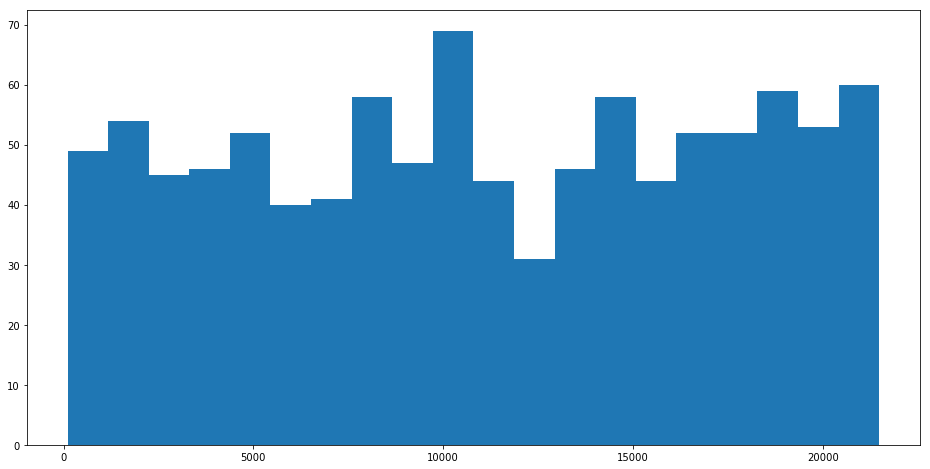

In [48]:
simple_hist(sample_ids)

Looks reasonably uniform... what about the labeled samples?

In [32]:
labeled_chunks = kdb.test_songs.find({"labeled": True})

labeled_ids = np.array([])
for chunk in labeled_chunks:
    labeled_ids = np.append(labeled_ids, int(chunk['chunk_id']))

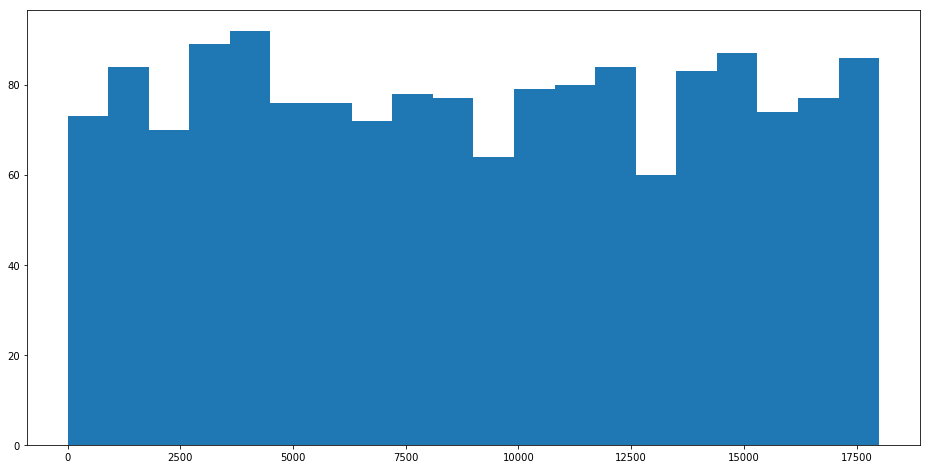

In [33]:
simple_hist(labeled_ids)

Reasonably uniform through the first batch, but it's not labeling anything from the second batch, even though they're in the DB...

In [34]:
kdb.test_songs.count()

21487

In [38]:
kdb.test_songs.find_one({"chunk_id": '019000'})

{'_id': ObjectId('5a1c5d5f8d3ce008f5eadd11'),
 'chunk_id': '019000',
 'labeled': False,
 'song_name': 'Symphony No.9 _From the New World_ II Largo'}

In [39]:
kdb.test_songs.find_one({"chunk_id": '015000'})

{'_id': ObjectId('5a148f418d3ce00a04e3befa'),
 'chunk_id': '015000',
 'song_name': 'Blues Walk'}

Songs from the first batch have no 'labeled' field, while those from the second have it set to False. The query looks for a sample where 'labeled' doesn't exist. I'll just delete it when it's False and change the chunk log function.

In [42]:
kdb.test_songs.find({"labeled": False}).count()

0

In [41]:
result = kdb.test_songs.update_many({"labeled": False}, {"$unset": {"labeled": "$"}})
result.modified_count

3486

Done

## Sketchpad

In [3]:
kdb.test_songs.find({"sax": 2, "sax1203": {"$exists": False}}).count()

49